# Loi de Benford et Protéome humain
Ce script à pour but de vérifier si le protéome humain suit la loi de Benford.
## Récupération des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import benford

In [3]:
data = pd.read_csv("uniprot-proteome_UP000005640_reviewed_yes.tab", sep = "\t", index_col=0)
data.head()

,Entry name,Status,Protein names,Gene names,Organism,Length
Entry,,,,,,
O95825,QORL1_HUMAN,reviewed,Quinone oxidoreductase-like protein 1 (EC 1.-....,CRYZL1 4P11,Homo sapiens (Human),349
Q9Y2J0,RP3A_HUMAN,reviewed,Rabphilin-3A (Exophilin-1),RPH3A KIAA0985,Homo sapiens (Human),694
Q13905,RPGF1_HUMAN,reviewed,Rap guanine nucleotide exchange factor 1 (CRK ...,RAPGEF1 GRF2,Homo sapiens (Human),1077
Q5TD94,RSH4A_HUMAN,reviewed,Radial spoke head protein 4 homolog A (Radial ...,RSPH4A RSHL3,Homo sapiens (Human),716
Q9HA92,RSAD1_HUMAN,reviewed,Radical S-adenosyl methionine domain-containin...,RSAD1,Homo sapiens (Human),442


In [4]:
data.describe()

,Length
count,20379.000000
mean,557.467049
std,596.808822
min,2.000000
25%,249.500000
50%,415.000000
75%,670.000000
max,34350.000000


## Distribution de la longeur des protéines du protéome humain :

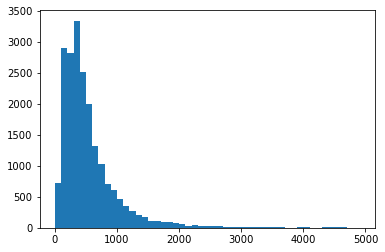

In [5]:
plt.hist(data["Length"], bins=range(0,5000,100));

In [6]:
data[data["Length"] > 5000].shape

(33, 6)

## Analyse des $1^{er}$ digit de la longeur des protéines du protéome humain

In [7]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(data["Length"])

### Histogramme de la fréquence des first digit de la loi de Benford et de la taille de l'ensemble des protéines du protéome humain

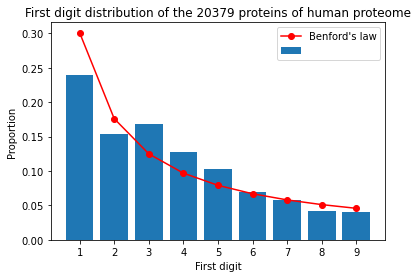

In [10]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=(f"First digit distribution of the {data.shape[0]} "
                            "proteins of human proteome"))

### Test statistique par la procédure "bootstrap"

In [9]:
 statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(data["Length"], f_benford, nb_digit=1)

statistics : 57.64403460816461 ; p-value : 1.3480682584176293e-09 ; number of significant tests : 1000


Le résultat du test montre que le premier chiffre significatif de la taille des protéines du protéome humain ne suit pas la loi de Benford pour un risque $\alpha = 5\%$.

## Analyse des deux $1^{er}$ digit de la longeur des protéines du protéome humain

In [22]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(data["Length"],2)

### Histogramme de la fréquence des first digit de la loi de Benford et de la taille de l'ensemble des protéines du protéome humain

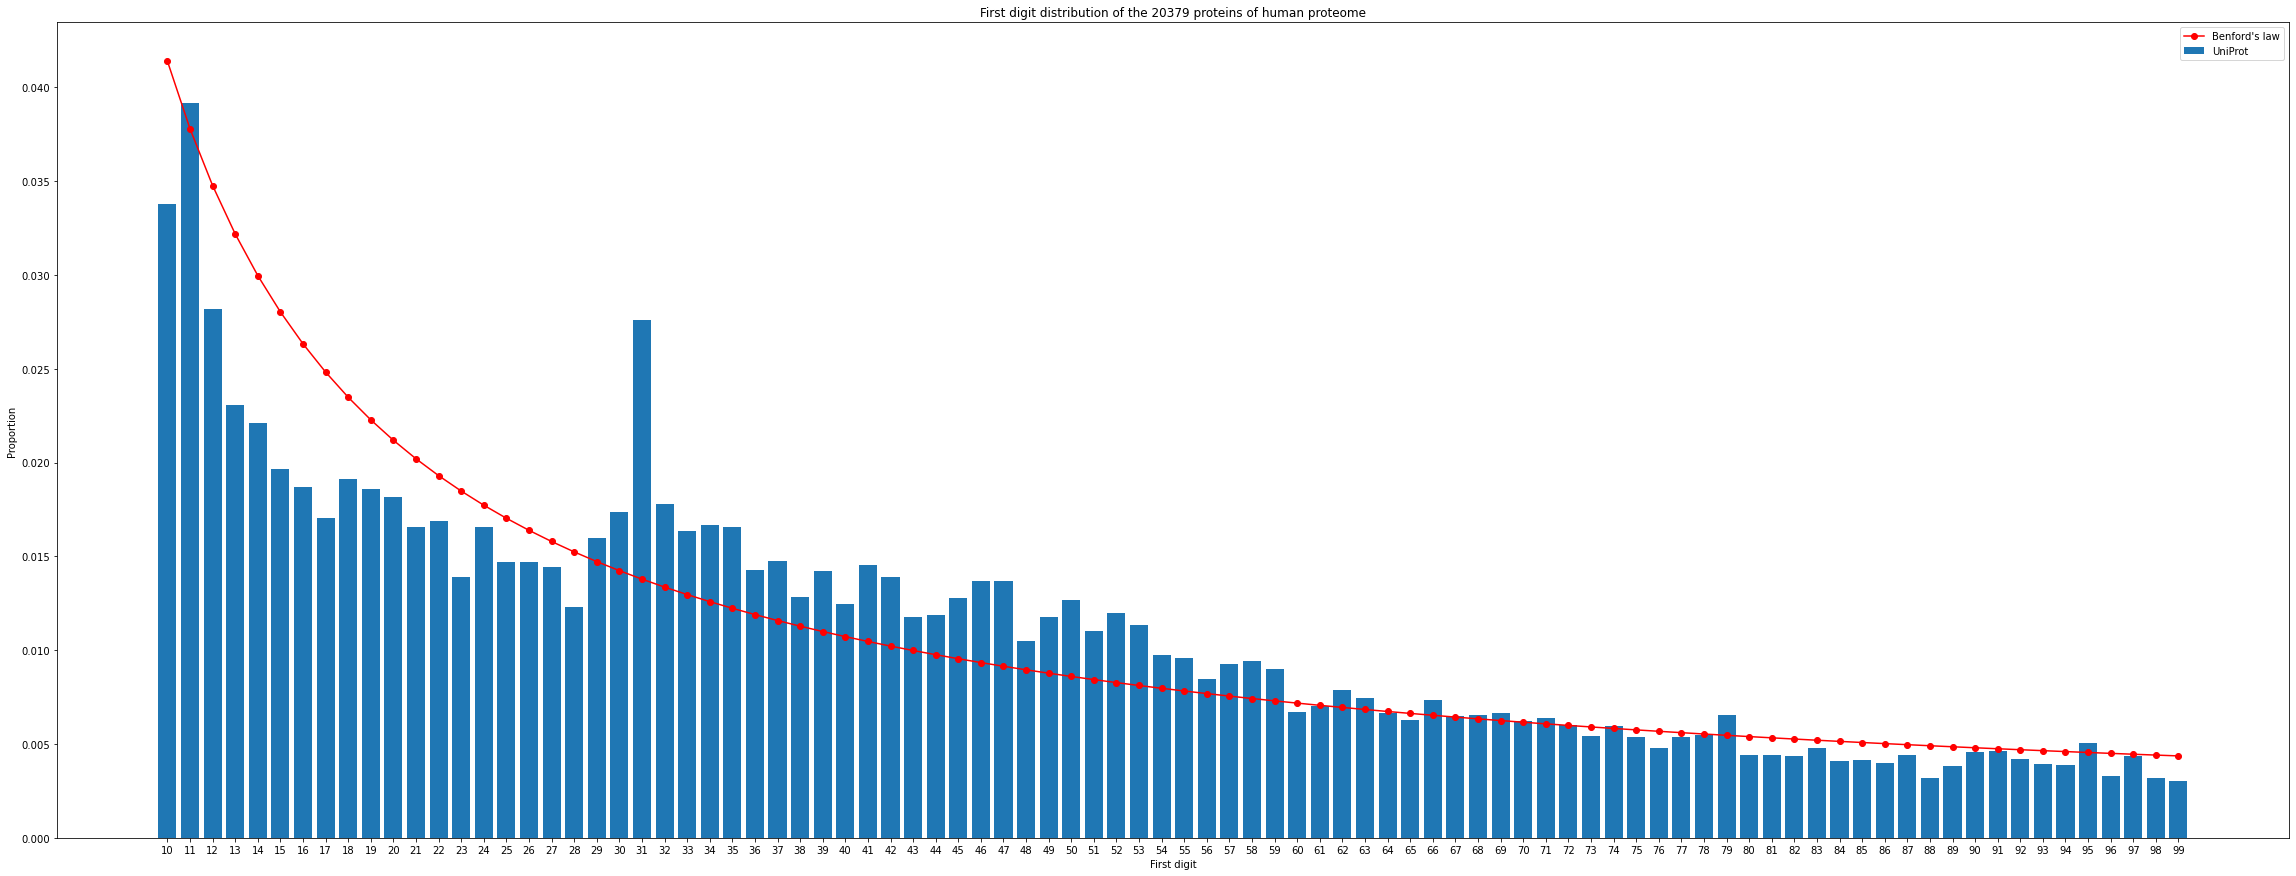

In [23]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=(f"First digit distribution of the {data.shape[0]} "
                            "proteins of human proteome"), legend="UniProt", 
                            size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [ ]:
 statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(data["Length"], f_benford, nb_digit=2)

Le résultat du test montre que les deux premiers chiffres significatifs de la taille des protéines du protéome humain ne suit pas la loi de Benford pour un risque $\alpha = 5\%$.